# Linear Regression

There are two techniques in which we can achieve Linear Regression

    1. Ordinary Least Square (OLS)
    2. Gradient Descent

### Ordinary Least Square(OLS)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.drop("Unnamed: 0",axis=1,inplace=True)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


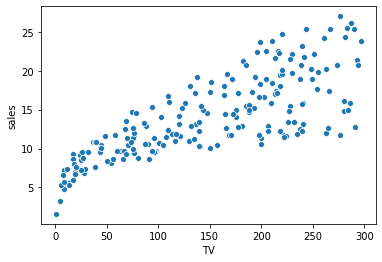

In [4]:
sns.scatterplot(data=df,x="TV", y="sales")
plt.show()

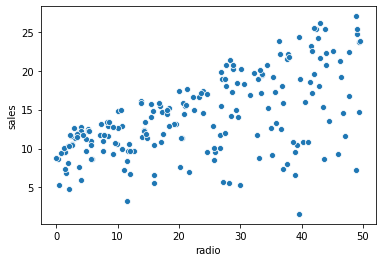

In [5]:
sns.scatterplot(data=df,x="radio", y="sales")
plt.show()

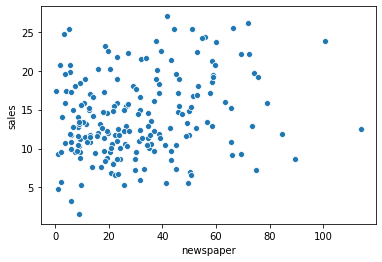

In [6]:
sns.scatterplot(data=df,x="newspaper", y="sales")
plt.show()

In [7]:
cor = df.corr()
cor

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


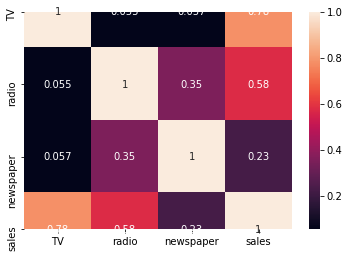

In [8]:
sns.heatmap(cor,annot=True)
plt.show()

# Find the model that will return the best investment return

# Modeling with TV

In [9]:
#In linear regression model it expects a 2 dimensional array input for x axis, therefore we write a axis columns in
#double square brakects
x_tv = df[["TV"]] 
x_radio = df[["radio"]]
x_news = df[["newspaper"]]
y = df["sales"]

In [10]:
# spliting data for training and testing
x_train, x_test, y_train, y_test = train_test_split(x_tv, y, random_state=1, test_size=0.3)
#random state - if random state is not mentioned random data will be picked for every split
#test_size means the percentage of data to be kept for testing

In [11]:
#create object of the LinearRegression
lr = LinearRegression()

In [12]:
#fit method will find the slope(theta 1) and intercept (theta 0)
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
#return the value of intercept(theta 0)
lr.intercept_

6.923519536059554

In [14]:
#returns the value of slope( theta 1)
lr.coef_

array([0.04812204])

In [15]:
#Testing 
#predict function will be predict y hat (yhat=theta0+theta1 * x)
y_pred = lr.predict(x_test)
x_test['TV'].to_list()

[210.8,
 202.5,
 95.7,
 280.2,
 253.8,
 283.6,
 163.3,
 180.8,
 70.6,
 215.4,
 164.5,
 69.2,
 214.7,
 109.8,
 225.8,
 125.7,
 131.7,
 290.7,
 25.6,
 210.7,
 100.4,
 67.8,
 25.1,
 107.4,
 112.9,
 188.4,
 43.1,
 248.8,
 166.8,
 240.1,
 239.9,
 234.5,
 149.7,
 170.2,
 248.4,
 184.9,
 222.4,
 129.4,
 216.8,
 19.6,
 13.1,
 90.4,
 18.7,
 204.1,
 7.3,
 147.3,
 78.2,
 228.0,
 205.0,
 229.5,
 289.7,
 123.1,
 19.4,
 182.6,
 265.6,
 165.6,
 218.5,
 25.0,
 232.1,
 43.0]

In [16]:
mean_squared_error(y_test, y_pred)

10.571057434656955

In [17]:
r2_score(y_test, y_pred)

0.575061860494331

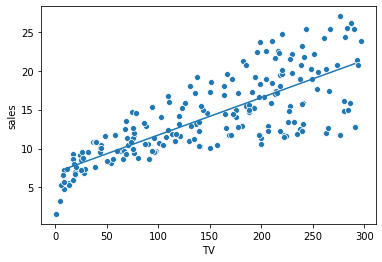

In [18]:
sns.scatterplot(data=df, x="TV", y="sales")
sns.lineplot(x_test['TV'].to_list(), y_pred)
plt.show()

# Modeling with Radio

[0.1874808]
MSE: 14.604130559272193
R2: 0.41293932917162335


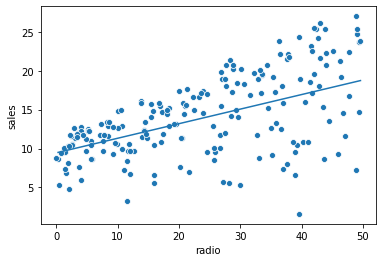

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x_radio, y, random_state=1, test_size=0.3)
lr = LinearRegression()
#fit method will find the slope(theta 1) and intercept (theta 0)
lr.fit(x_train,y_train)
#return the value of intercept(theta 0)
lr.intercept_
#returns the value of slope( theta 1)
print(lr.coef_)
#predict function will be predict y hat (yhat=theta0+theta1 * x)
y_pred = lr.predict(x_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:",r2_score( y_test, y_pred))
sns.scatterplot(data=df, x="radio", y="sales")
sns.lineplot(x_test['radio'].to_list(), y_pred)
plt.show()

# Modeling with Newspaper

[0.06532045]
MSE: 25.49745237441493
R2: -0.024953278429509007


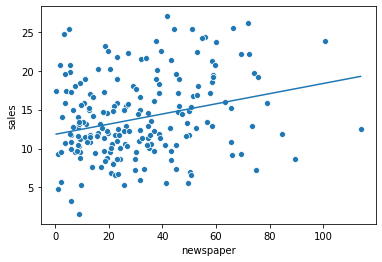

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x_news, y, random_state=1, test_size=0.3)
lr = LinearRegression()
#fit method will find the slope(theta 1) and intercept (theta 0)
lr.fit(x_train,y_train)
#return the value of intercept(theta 0)
lr.intercept_
#returns the value of slope( theta 1)
print(lr.coef_)
#predict function will be predict y hat (yhat=theta0+theta1 * x)
y_pred = lr.predict(x_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:",r2_score( y_test, y_pred))
sns.scatterplot(data=df, x="newspaper", y="sales")
sns.lineplot(x_test['newspaper'].to_list(), y_pred)
plt.show()

# Gradient descent

A gradient is basically the slope of a function; the degree of change of a parameter with the amount of change in another parameter. Gradient Descent can be described as an looping construct which is used to find the values of the parameters of a function that minimizes the cost function. The parameters are initially defined a particular value and from that, Gradient Descent is run in a loop to find the optimal values of the parameters, to find the minimum possible value of the given cost function.

### Types of Gradient Descent:

    1. Batch Gradient Descent
    2. Stochastic Gradient Descent

# Batch Gradient Descent

In [28]:
def gradient_descent(x,y):
    n = len(x)
    learning_rate = 0.00001
    intercept = slope = 0
    iterations = 500
    
    for i in range(iterations):
        
        y_pred = x*slope + intercept
        
        mse = mean_squared_error(y_pred,y)
        
        md = (2/n)*sum(x*(y-y_pred))
        bd = (2/n)*sum(y-y_pred)

        slope = slope + (learning_rate * md)
        intercept = intercept + (learning_rate * bd)
        
        print("slope: ",slope,"intercept: ",intercept,"mse: ",mse,"iteration: ",i)

In [29]:
#testing gradient descent function
x = np.array([10,12,13,14,20,21])
y1 = np.array([12,12,13,15,16,26])
gradient_descent(x,y1)

slope:  0.005030000000000001 intercept:  0.0003133333333333333 mse:  269.0 iteration:  0
slope:  0.010035594333333335 intercept:  0.0006251514 mse:  266.4662539865667 iteration:  1
slope:  0.015016901415302226 intercept:  0.0009354615520053334 mse:  263.95703558904864 iteration:  2
slope:  0.019974039086662662 intercept:  0.001244271105683036 mse:  261.47210737087386 iteration:  3
slope:  0.024907124616412087 intercept:  0.001551587341868257 mse:  259.01123419394577 iteration:  4
slope:  0.029816274704563536 intercept:  0.0018574175060698294 mse:  256.57418319639334 iteration:  5
slope:  0.03470160548490633 intercept:  0.0021617688086416724 mse:  254.16072377053624 iteration:  6
slope:  0.03956323252775335 intercept:  0.002464648424953361 mse:  251.77062754106342 iteration:  7
slope:  0.04440127084267506 intercept:  0.002766063495559869 mse:  249.40366834342305 iteration:  8
slope:  0.04921583488122013 intercept:  0.0030660211263704887 mse:  247.0596222024213 iteration:  9
slope:  0.05

slope:  0.5417204052718456 intercept:  0.03379129408293152 mse:  67.50912671301874 iteration:  151
slope:  0.5441219525914734 intercept:  0.03394143546880164 mse:  66.9258881838843 iteration:  152
slope:  0.546511847389974 intercept:  0.03409085338764816 mse:  66.34829562262911 iteration:  153
slope:  0.5488901462049062 intercept:  0.03423955134969675 mse:  65.77629437415486 iteration:  154
slope:  0.5512569052995109 intercept:  0.03438753284814162 mse:  65.20983031244522 iteration:  155
slope:  0.5536121806640422 intercept:  0.03453480135922814 mse:  64.64884983544407 iteration:  156
slope:  0.5559560280170915 intercept:  0.03468136034233507 mse:  64.0932998599834 iteration:  157
slope:  0.5582885028069062 intercept:  0.03482721324005643 mse:  63.543127816760354 iteration:  158
slope:  0.5606096602127009 intercept:  0.03497236347828289 mse:  62.99828164536274 iteration:  159
slope:  0.5629195551459627 intercept:  0.03511681446628285 mse:  62.458709789342684 iteration:  160
slope:  0.5

slope:  0.7968870893465939 intercept:  0.04978829285937666 mse:  21.400751090992994 iteration:  300
slope:  0.7980505319268942 intercept:  0.04986156430004882 mse:  21.263858872010186 iteration:  301
slope:  0.7992083292199575 intercept:  0.04993448524251809 mse:  21.12829182029567 iteration:  302
slope:  0.8003605086164883 intercept:  0.05000705738738059 mse:  20.994037107730545 iteration:  303
slope:  0.8015070973742924 intercept:  0.050079282426981224 mse:  20.86108203037693 iteration:  304
slope:  0.8026481226189218 intercept:  0.05015116204545373 mse:  20.72941400727586 iteration:  305
slope:  0.8037836113443168 intercept:  0.05022269791876048 mse:  20.599020579256788 iteration:  306
slope:  0.8049135904134436 intercept:  0.05029389171473214 mse:  20.469889407758615 iteration:  307
slope:  0.8060380865589308 intercept:  0.05036474509310715 mse:  20.34200827366222 iteration:  308
slope:  0.8071571263837014 intercept:  0.05043525970557094 mse:  20.215365076134123 iteration:  309
slo

slope:  0.8765319805204252 intercept:  0.05481925971377782 mse:  13.566839875309554 iteration:  383
slope:  0.8773089635033291 intercept:  0.05486853706776075 mse:  13.505782785196695 iteration:  384
slope:  0.878082176285276 intercept:  0.05491758034130173 mse:  13.44531674970544 iteration:  385
slope:  0.8788516371591281 intercept:  0.054966390670142654 mse:  13.385436047204195 iteration:  386
slope:  0.8796173643289912 intercept:  0.055014969184514845 mse:  13.326135011448835 iteration:  387
slope:  0.8803793759106457 intercept:  0.055063317009165794 mse:  13.26740803104667 iteration:  388
slope:  0.8811376899319748 intercept:  0.05511143526338575 mse:  13.209249548925408 iteration:  389
slope:  0.8818923243333913 intercept:  0.05515932506103422 mse:  13.151654061807266 iteration:  390
slope:  0.8826432969682616 intercept:  0.05520698751056632 mse:  13.094616119688327 iteration:  391
slope:  0.8833906256033285 intercept:  0.05525442371505896 mse:  13.03813032532271 iteration:  392
s

In [30]:
#Gradient descent of TV
gradient_descent(df["TV"],y)

slope:  0.048210834 intercept:  0.00028045000000000007 mse:  223.71625 iteration:  0
slope:  0.06850137850115379 intercept:  0.0004191135598311 mse:  58.58494359559259 iteration:  1
slope:  0.07704102067320312 intercept:  0.0004981028985947853 mse:  29.334425285846336 iteration:  2
slope:  0.0806350226667981 intercept:  0.000551976850890024 mse:  24.153051575792162 iteration:  3
slope:  0.08214753712130003 intercept:  0.000595280304943353 mse:  23.23514829450518 iteration:  4
slope:  0.08278400919957841 intercept:  0.000634134814794079 mse:  23.072451748656416 iteration:  5
slope:  0.08305177849684756 intercept:  0.0006711167786432029 mse:  23.043528199827698 iteration:  6
slope:  0.08316437066553904 intercept:  0.0007073105335151759 mse:  23.038300434616048 iteration:  7
slope:  0.08321165293595859 intercept:  0.0007431724478327551 mse:  23.037270005863764 iteration:  8
slope:  0.08323144801929265 intercept:  0.0007788945948470846 mse:  23.03698307031111 iteration:  9
slope:  0.083239

slope:  0.08322986969068487 intercept:  0.003948488413115533 mse:  23.025660760050588 iteration:  98
slope:  0.08322968888223228 intercept:  0.00398409288106742 mse:  23.025533988004337 iteration:  99
slope:  0.0832295080746956 intercept:  0.004019697168660486 mse:  23.025407217242446 iteration:  100
slope:  0.08322932726807483 intercept:  0.004055301275895644 mse:  23.02528044776489 iteration:  101
slope:  0.08322914646236995 intercept:  0.004090905202773808 mse:  23.02515367957166 iteration:  102
slope:  0.08322896565758096 intercept:  0.004126508949295892 mse:  23.025026912662753 iteration:  103
slope:  0.08322878485370787 intercept:  0.0041621125154628095 mse:  23.024900147038153 iteration:  104
slope:  0.08322860405075067 intercept:  0.004197715901275474 mse:  23.02477338269784 iteration:  105
slope:  0.08322842324870934 intercept:  0.004233319106734798 mse:  23.0246466196418 iteration:  106
slope:  0.08322824244758388 intercept:  0.004268922131841697 mse:  23.024519857870033 iter

slope:  0.083212516255112 intercept:  0.007365695030795855 mse:  23.013496498413236 iteration:  194
slope:  0.08321233553456538 intercept:  0.007401282188466393 mse:  23.01336984960581 iteration:  195
slope:  0.08321215481493421 intercept:  0.007436869165865797 mse:  23.013243202081483 iteration:  196
slope:  0.08321197409621853 intercept:  0.007472455962994981 mse:  23.013116555840252 iteration:  197
slope:  0.08321179337841828 intercept:  0.007508042579854856 mse:  23.012989910882105 iteration:  198
slope:  0.08321161266153349 intercept:  0.007543629016446338 mse:  23.012863267207027 iteration:  199
slope:  0.08321143194556413 intercept:  0.007579215272770338 mse:  23.012736624815002 iteration:  200
slope:  0.08321125123051021 intercept:  0.0076148013488277705 mse:  23.01260998370602 iteration:  201
slope:  0.08321107051637172 intercept:  0.007650387244619548 mse:  23.012483343880067 iteration:  202
slope:  0.08321088980314867 intercept:  0.007685972960146584 mse:  23.012356705337133

slope:  0.08319571316002204 intercept:  0.01067452961273207 mse:  23.001723646767644 iteration:  287
slope:  0.08319553252459357 intercept:  0.010710100009093166 mse:  23.001597117233576 iteration:  288
slope:  0.08319535189008014 intercept:  0.010745670225268032 mse:  23.0014705889814 iteration:  289
slope:  0.08319517125648172 intercept:  0.010781240261257584 mse:  23.00134406201112 iteration:  290
slope:  0.08319499062379833 intercept:  0.010816810117062734 mse:  23.001217536322702 iteration:  291
slope:  0.08319480999202995 intercept:  0.010852379792684396 mse:  23.001091011916152 iteration:  292
slope:  0.0831946293611766 intercept:  0.010887949288123481 mse:  23.000964488791446 iteration:  293
slope:  0.08319444873123824 intercept:  0.010923518603380903 mse:  23.000837966948573 iteration:  294
slope:  0.08319426810221489 intercept:  0.010959087738457574 mse:  23.000711446387523 iteration:  295
slope:  0.08319408747410655 intercept:  0.010994656693354405 mse:  23.000584927108275 i

slope:  0.08317476555240187 intercept:  0.01479949397979615 mse:  22.987054767788777 iteration:  403
slope:  0.08317458502308608 intercept:  0.014835043480641774 mse:  22.986928386868357 iteration:  404
slope:  0.0831744044946848 intercept:  0.014870592801407019 mse:  22.986802007228334 iteration:  405
slope:  0.083174223967198 intercept:  0.014906141942092797 mse:  22.986675628868692 iteration:  406
slope:  0.08317404344062569 intercept:  0.014941690902700021 mse:  22.986549251789413 iteration:  407
slope:  0.08317386291496785 intercept:  0.014977239683229603 mse:  22.98642287599049 iteration:  408
slope:  0.08317368239022449 intercept:  0.015012788283682455 mse:  22.986296501471905 iteration:  409
slope:  0.0831735018663956 intercept:  0.01504833670405949 mse:  22.986170128233663 iteration:  410
slope:  0.08317332134348118 intercept:  0.015083884944361619 mse:  22.986043756275716 iteration:  411
slope:  0.08317314082148122 intercept:  0.015119433004589755 mse:  22.98591738559808 iter

# Assumption of Linear Regression
### Linear Regression will work best if all the assumption are satisfied

    1. Must have linear corelation - (PLease note if the data is not linear you will plot Polynomial regression)
    2. There should be little or no variance among residuals (Homoskedestic)
    3. There should be no multicolinearity (or any column that is dependent on the other column)
    4. Resudials must be normally distributed(bell curve)
    
##### You can use linear regression if Test 2, 3 or 4 fails but you can't use linear regression if Test 1 fails

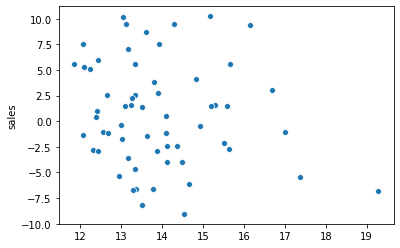

In [21]:
# 1. Must have linear corelation 
# Checking test 1
#we are calculating residual to check for linear corelation and homoskedestic
residuals = y_test - y_pred
sns.scatterplot(y_pred, residuals)
plt.show()